In [1]:
import sys
sys.path.append("Pytorch-Sketch-RNN")
import sketch_rnn
import importlib

/home/kevin/anaconda3/envs/ai4m/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
importlib.reload(sketch_rnn)
model = sketch_rnn.Model("Pytorch-Sketch-RNN/cat.npz")
model.load('/home/kevin/Documents/dmp_testing/Pytorch-Sketch-RNN/final_trained/encoderRNN45000.pth','/home/kevin/Documents/dmp_testing/Pytorch-Sketch-RNN/final_trained/decoderRNN45000.pth')


/home/kevin/anaconda3/envs/ai4m/lib/python3.9/site-packages/torch/nn/modules/rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.9 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import PIL

In [18]:
sequence = model.conditional_generation(10)
strokes = np.split(sequence, np.where(sequence[:,2]>0)[0]+1)


81


/home/kevin/anaconda3/envs/ai4m/lib/python3.9/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/kevin/Documents/dmp_testing/Pytorch-Sketch-RNN/sketch_rnn.py:186: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pi = F.softmax(pi.transpose(0,1).squeeze()).view(len_out,-1,hp.M)
/home/kevin/Documents/dmp_testing/Pytorch-Sketch-RNN/sketch_rnn.py:192: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  q = F.softmax(params_pen).view(len_out,-1,3)


In [19]:
def get_strokes(sequence):
    return np.split(sequence, np.where(sequence[:,2]>0)[0]+1)

def plot_strokes(strokes):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for s in strokes:
        plt.plot(s[:,0],-s[:,1])
    canvas = plt.get_current_fig_manager().canvas
    canvas.draw()
    return canvas

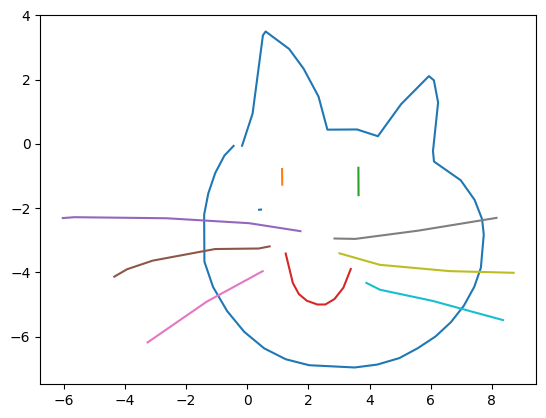

In [20]:
plot_strokes(get_strokes(sequence))

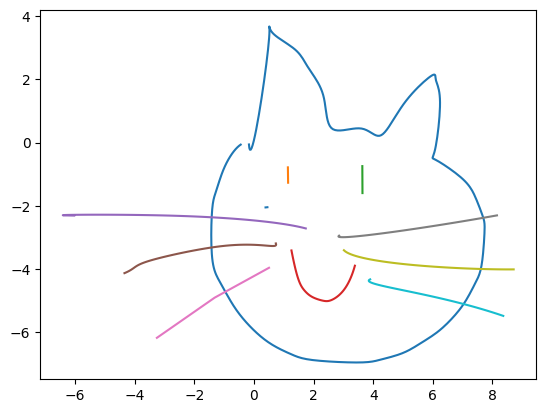

In [21]:
# https://stackoverflow.com/questions/27642237/smoothing-a-2-d-figure
from scipy import interpolate
def interpolate_strokes(strokes):
    out = []
    for s in strokes:
        #x, y, _ = zip(*s)
        x = s[:, 0]
        y = s[:, 1]
        #create spline function
        if len(x) <= 3:
            out.append(s)
            continue
        t = np.arange(len(x))
        ti = np.linspace(0, t.max(), 10 * t.size)

        xint = interpolate.interp1d(t, x, kind='cubic')(ti)
        yint = interpolate.interp1d(t, y, kind='cubic')(ti)
        stroke_z = np.zeros(len(xint))
        stroke_z[-1] = 1
        out.append(np.stack([xint, yint, stroke_z]).T)
    return out

interped = interpolate_strokes(get_strokes(sequence))
plot_strokes(interped)

In [22]:
drawing_bottom_left = np.min(np.array(sequence[:,:2]), axis=0)
drawing_dims = np.max(np.array(sequence[:,:2]), axis=0) - drawing_bottom_left
canvas_top_left = [ 0.32886487, -0.25668124] # ,  0.10390387
canvas_bottom_right = [ 0.59114306,  0.28672476] # ,  0.10615327
canvas_bottom_left = np.array([0.32886487, 0.28672476])
canvas_top_right = np.array([0.59114306, -0.25668124])
canvas_dims = np.abs(canvas_top_right - canvas_bottom_left)

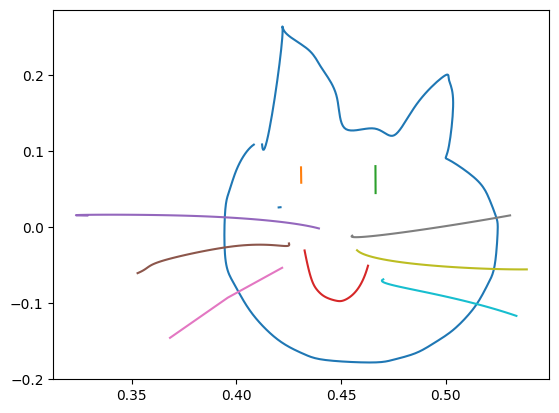

In [23]:
transformed_sequence = sequence - np.pad(drawing_bottom_left, (0, 1), constant_values=0)
transformed_sequence = transformed_sequence * np.pad(canvas_dims, (0, 1), constant_values=1)/np.pad(drawing_dims, (0, 1), constant_values=1) * 0.8
transformed_sequence = transformed_sequence + np.pad(canvas_top_left, (0, 1), constant_values=0)

interped = interpolate_strokes(get_strokes(transformed_sequence))
plot_strokes(interped)



1. Move to python file
1. Add lifts between strokes
1. replay trajectory using example code
  
  
1. learn dmp from trajectory
1. Use dmp to generate trajectory
1. Run dmp
1. Run dmp again with different goal states
